# Parental Leave Policies

**In this case study we will answer the following questions**

1. Which companies offer the most paid parental leave weeks?
2. Is maternity leave typically longer than paternity leave?
3. What is the distribution of parental leave weeks offered?
4. Are there noticeable differences between industries?

In [1]:
#Importing useful libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Reading file

df = pd.read_csv('/kaggle/input/parental-leave-policies/parental_leave.csv', encoding = 'unicode_escape')
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,NaN,NaN,NaN,NaN
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,NaN,NaN,NaN,NaN
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**First of all, we will do some basic analysis. Then we will jump to questions**

# Performing some basic analysis on dataset

In [3]:
#To see min, max, count, mean and stdv etc. 

df.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,1601.000000,1494.000000,289.000000,64.000000,0.0,0.0,0.0,0.0
mean,10.909119,6.628849,7.332180,7.734375,NaN,NaN,NaN,NaN
std,8.024514,9.274953,6.817591,6.831863,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
50%,11.000000,4.000000,6.000000,6.000000,NaN,NaN,NaN,NaN
75%,12.000000,10.000000,12.000000,12.000000,NaN,NaN,NaN,NaN
max,52.000000,52.000000,51.000000,29.000000,NaN,NaN,NaN,NaN


In [4]:
#To get information in short/summarized way. It gives info like column name, null/not null counts and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 125.2+ KB


In [5]:
#To get the shape of data

df.shape

(1601, 10)

In [6]:
#To get the name of all columns

df.columns

Index(['Company', 'Industry', 'Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [7]:
#To drop unwanted columns 

df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace = True)
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0
...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN


In [8]:
#To get the sum of all null values

df.isnull().sum()

Company                      0
Industry                     3
Paid Maternity Leave         0
Unpaid Maternity Leave     107
Paid Paternity Leave      1312
Unpaid Paternity Leave    1537
dtype: int64

In [9]:
#If we want to rename the column, example

df.rename(columns = {"Industry":"Type of Industry"}, inplace = True)
df

,Company,Type of Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0
...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN


In [10]:
#Filling null values with 0

col = ["Type of Industry", "Unpaid Maternity Leave", "Paid Paternity Leave", "Unpaid Paternity Leave"]

for i in col:
    df[i].fillna(0, inplace = True)
    
df

,Company,Type of Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0
...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0


In [11]:
df.isnull().sum()

Company                   0
Type of Industry          0
Paid Maternity Leave      0
Unpaid Maternity Leave    0
Paid Paternity Leave      0
Unpaid Paternity Leave    0
dtype: int64

In [12]:
df.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
count,1601.000000,1601.000000,1601.000000,1601.000000
mean,10.909119,6.185821,1.323548,0.309182
std,8.024514,9.111204,4.040297,2.033463
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000
50%,11.000000,4.000000,0.000000,0.000000
75%,12.000000,9.000000,0.000000,0.000000
max,52.000000,52.000000,51.000000,29.000000


In [13]:
#Creating new columns as total paid weeks, total unpaid weeks etc.

df["total_weeks_for_maternity_leave"] = df["Paid Maternity Leave"] + df["Unpaid Maternity Leave"]
df["total_weeks_for_paternity_leave"] = df["Paid Paternity Leave"] + df["Unpaid Maternity Leave"]
df["total_paid_weeks"] = df["Paid Paternity Leave"] + df["Paid Maternity Leave"]
df["total_unpaid_weeks"] = df["Unpaid Paternity Leave"] + df["Unpaid Maternity Leave"]

df

,Company,Type of Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,total_weeks_for_maternity_leave,total_weeks_for_paternity_leave,total_paid_weeks,total_unpaid_weeks
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.0,8.5,9.5,8.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,14.0,8.0,22.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,16.0,18.0,30.0,6.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,12.0,7.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0


In [14]:
df.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,total_weeks_for_maternity_leave,total_weeks_for_paternity_leave,total_paid_weeks,total_unpaid_weeks
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,10.909119,6.185821,1.323548,0.309182,17.094941,7.509369,12.232667,6.495003
std,8.024514,9.111204,4.040297,2.033463,12.637199,9.914332,9.644139,9.397023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,12.000000,0.000000,6.000000,0.000000
50%,11.000000,4.000000,0.000000,0.000000,13.000000,6.000000,12.000000,4.000000
75%,12.000000,9.000000,0.000000,0.000000,20.000000,12.000000,15.000000,10.000000
max,52.000000,52.000000,51.000000,29.000000,104.000000,102.000000,102.000000,52.000000


# 1. Which companies offer the most paid parental leave weeks?

In [15]:
most_paid_parental_leaves_weeks = df.sort_values(["Paid Paternity Leave"], ascending = False)
most_paid_parental_leaves_weeks = most_paid_parental_leaves_weeks[["Company", "Paid Paternity Leave"]]
most_paid_parental_leaves_weeks

,Company,Paid Paternity Leave
47,Grant Thornton,51.0
148,LAC-Group,35.0
129,Flatiron Health,30.0
248,Salesforce,26.0
207,Hewlett Packard Enterprise,26.0
...,...,...
688,Corporation for National and Community Service,0.0
687,Spokane County,0.0
686,"Multnomah County, Oregon",0.0
685,Marion County Sheriff's Office,0.0


# 2. Is maternity leave typically longer than paternity leave?

In [16]:
leave_df = df.iloc[:,6:8].mean().to_frame().reset_index()
leave_df["index"][0]="Average_maternity_leave"
leave_df["index"][1]="Average_paternity_leave"
leave_df

/tmp/ipykernel_19/2166345642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leave_df["index"][0]="Average_maternity_leave"
/tmp/ipykernel_19/2166345642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leave_df["index"][1]="Average_paternity_leave"


,index,0
0,Average_maternity_leave,17.094941
1,Average_paternity_leave,7.509369


**Hence, from above average index it can be said that maternity leaves are typically longer than paternity leaves**

# 3. What is the distribution of parental leave weeks offered?

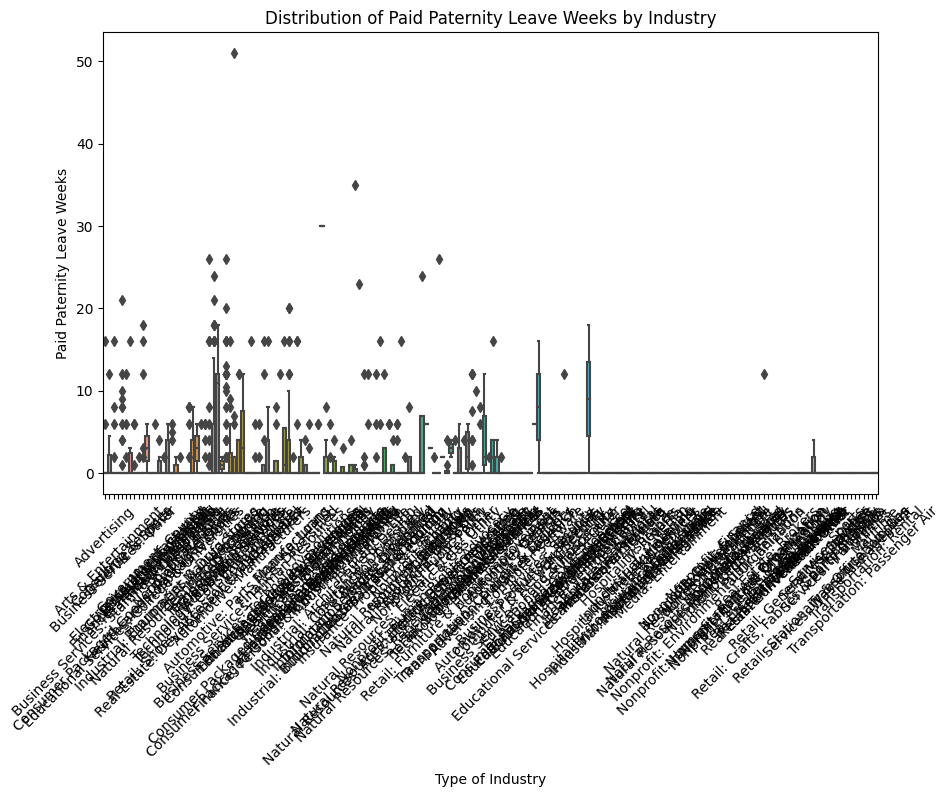

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type of Industry', y='Paid Paternity Leave')
plt.title('Distribution of Paid Paternity Leave Weeks by Industry')
plt.xticks(rotation=45)
plt.xlabel('Type of Industry')
plt.ylabel('Paid Paternity Leave Weeks')
plt.show()

# 4. Are there noticeable differences between industries?

In [18]:
#Let's get the unique records from industries first

df["Type of Industry"].unique()

array(['Advertising', 'Arts & Entertainment', 'Business Services: Other',
       'Business Services: Staffing & Outsourcing', 'Consulting Services',
       'Consumer Packaged Goods: Packaged Foods', 'Defense & Space',
       'Educational Services: College & Universities',
       'Electronics: Manufacturing', 'Finance: Asset Management',
       'Government: Contractor', 'Government: County',
       'Government: Federal', 'Healthcare: Diversified',
       'Healthcare: Hospitals & Clinics',
       'Industrial: Equipment Manufacturing', 'Insurance: Health',
       'Media: Television', 'Natural Resources: Metals & Mining',
       'Nonprofit: Religious', 'Pharmaceutical',
       'Pharmacies & Drug Stores', 'Real Estate',
       'Real Estate: Development & Management',
       'Retail: Shoes, Accessories and Apparel',
       'Technology: B2B Tech Services', 'Technology: Consumer Internet',
       'Technology: Gaming', 'Technology: Research',
       'Technology: Software', 'Telecommunications',

In [19]:
#Let's check mean of maternity leaves as per different industries

df.groupby(by = "Type of Industry")["Paid Maternity Leave"].mean()

Type of Industry
0                               25.666667
Accounting Services             11.846154
Advertising                      9.410000
Advertising: Market Research     9.333333
Aerospace                       10.000000
                                  ...    
Transportation: Rail            10.000000
Transportation: Rental          10.000000
Utilities                        2.000000
Wellness & Fitness              10.666667
Wholesale                        6.444444
Name: Paid Maternity Leave, Length: 186, dtype: float64

In [20]:
#Same as above, checking mean of paternity leaves as per different industries

df.groupby(by = "Type of Industry")["Paid Paternity Leave"].mean()

Type of Industry
0                               0.000000
Accounting Services             5.153846
Advertising                     0.440000
Advertising: Market Research    0.000000
Aerospace                       4.000000
                                  ...   
Transportation: Rail            4.000000
Transportation: Rental          0.000000
Utilities                       0.000000
Wellness & Fitness              1.333333
Wholesale                       0.222222
Name: Paid Paternity Leave, Length: 186, dtype: float64

In [21]:
df['Difference Between Paid Maternity and Paternity Leave'] = df['Paid Maternity Leave'] - df['Paid Paternity Leave']
df

,Company,Type of Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,total_weeks_for_maternity_leave,total_weeks_for_paternity_leave,total_paid_weeks,total_unpaid_weeks,Difference Between Paid Maternity and Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0,0.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.0,8.5,9.5,8.0,0.5
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,14.0,8.0,22.0,4.0,6.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,16.0,18.0,30.0,6.0,-2.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,12.0,7.0,5.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,6.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0,14.0


In [22]:
df.head()

,Company,Type of Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,total_weeks_for_maternity_leave,total_weeks_for_paternity_leave,total_paid_weeks,total_unpaid_weeks,Difference Between Paid Maternity and Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0,0.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.0,8.5,9.5,8.0,0.5
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,14.0,8.0,22.0,4.0,6.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,16.0,18.0,30.0,6.0,-2.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,12.0,7.0,5.0,7.0,5.0


In [23]:
df["Difference Between Paid Maternity and Paternity Leave"]

0        0.0
1        0.5
2        6.0
3       -2.0
4        5.0
        ... 
1596     6.0
1597     2.0
1598     0.0
1599    14.0
1600     0.0
Name: Difference Between Paid Maternity and Paternity Leave, Length: 1601, dtype: float64